<a href="https://colab.research.google.com/github/takeknock/kaggle-solutions/blob/master/ProbSpace_RealEstatePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://prob.space/competitions/real_estate_2020/data/50
#invite people for the Kaggle party
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [57]:
!ls -ll /root/.cache/matplotlib/
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json

total 52
-rw-r--r-- 1 root root 46443 Apr 23 16:42 fontList.json
drwxr-xr-x 2 root root  4096 Apr 23 16:21 tex.cache
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
rm: cannot remove '/root/.cache/matplotlib/fontlist-v310.json': No such file or directory


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font='IPAGothic')


In [0]:
trainpath = "/content/drive/My Drive/ProbSpace/RealEstate/train_data.csv"
testpath = "/content/drive/My Drive/ProbSpace/RealEstate/test_data.csv"
df_train = pd.read_csv(trainpath)
df_test = pd.read_csv(testpath)



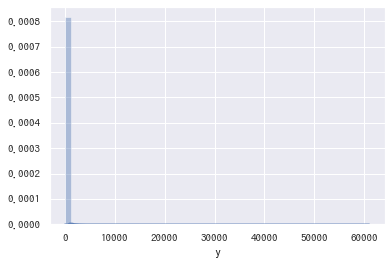

In [60]:
sns.distplot(df_train['y'])

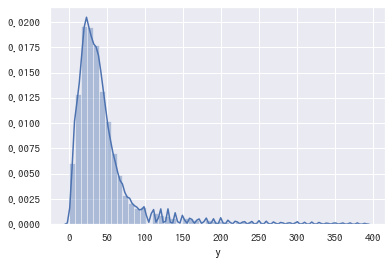

In [61]:
df_train_less400 = df_train[df_train['y'] < 400]
sns.distplot(df_train_less400['y'])

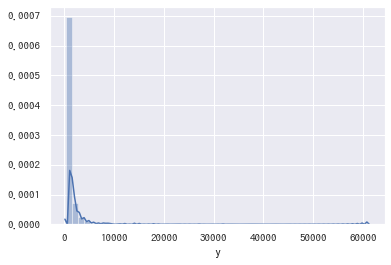

In [62]:
df_train_more400 = df_train[df_train['y'] >= 400]
sns.distplot(df_train_more400['y'])

In [63]:
df_train['y'].describe()

count    356344.000000
mean         65.434766
std         315.011339
min           0.000500
25%          21.000000
50%          35.000000
75%          53.000000
max       61000.000000
Name: y, dtype: float64

In [64]:
df_train.columns

Index(['id', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', 'y'],
      dtype='object')

In [65]:
# nullの数(decending order)
df_train.isnull().sum().sort_values(ascending=False)

取引の事情等        328208
今後の利用目的       244965
延床面積（㎡）       236201
改装            212071
間取り           202568
間口            176081
前面道路：幅員（ｍ）    163065
前面道路：種類       161971
前面道路：方位       159830
土地の形状         159801
地域            159406
建築年            82841
用途             81061
建物の構造          78829
最寄駅：距離（分）      10129
建ぺい率（％）         5386
容積率（％）          5386
都市計画            3447
最寄駅：名称          1551
地区名              246
都道府県名              0
種類                 0
市区町村コード            0
y                  0
市区町村名              0
面積（㎡）              0
取引時点               0
id                 0
dtype: int64

[Text(0, 0, '飯田橋'),
 Text(0, 0, '九段下'),
 Text(0, 0, '水道橋'),
 Text(0, 0, '麹町'),
 Text(0, 0, '半蔵門'),
 Text(0, 0, '秋葉原'),
 Text(0, 0, '岩本町'),
 Text(0, 0, '神田(東京)'),
 Text(0, 0, '小伝馬町'),
 Text(0, 0, '新日本橋'),
 Text(0, 0, '馬喰町'),
 Text(0, 0, '大手町(東京)'),
 Text(0, 0, '小川町(東京)'),
 Text(0, 0, '溜池山王'),
 Text(0, 0, '淡路町'),
 Text(0, 0, '新御茶ノ水'),
 Text(0, 0, '浅草橋'),
 Text(0, 0, '神保町'),
 Text(0, 0, '御茶ノ水'),
 Text(0, 0, '竹橋'),
 Text(0, 0, '四ツ谷'),
 Text(0, 0, '市ケ谷'),
 Text(0, 0, '末広町(東京)'),
 Text(0, 0, '湯島'),
 Text(0, 0, '永田町'),
 Text(0, 0, '馬喰横山'),
 Text(0, 0, '日比谷'),
 Text(0, 0, '新富町(東京)'),
 Text(0, 0, '築地'),
 Text(0, 0, '八丁堀(東京)'),
 Text(0, 0, '勝どき'),
 Text(0, 0, '京橋(東京)'),
 Text(0, 0, '宝町(東京)'),
 Text(0, 0, '東京'),
 Text(0, 0, '銀座'),
 Text(0, 0, '銀座一丁目'),
 Text(0, 0, '汐留'),
 Text(0, 0, '新橋'),
 Text(0, 0, '築地市場'),
 Text(0, 0, '東銀座'),
 Text(0, 0, '茅場町'),
 Text(0, 0, '月島'),
 Text(0, 0, '日本橋(東京)'),
 Text(0, 0, '水天宮前'),
 Text(0, 0, '人形町'),
 Text(0, 0, '三越前'),
 Text(0, 0, '浜町'),
 Text(0, 0, '東日本橋'),
 Text

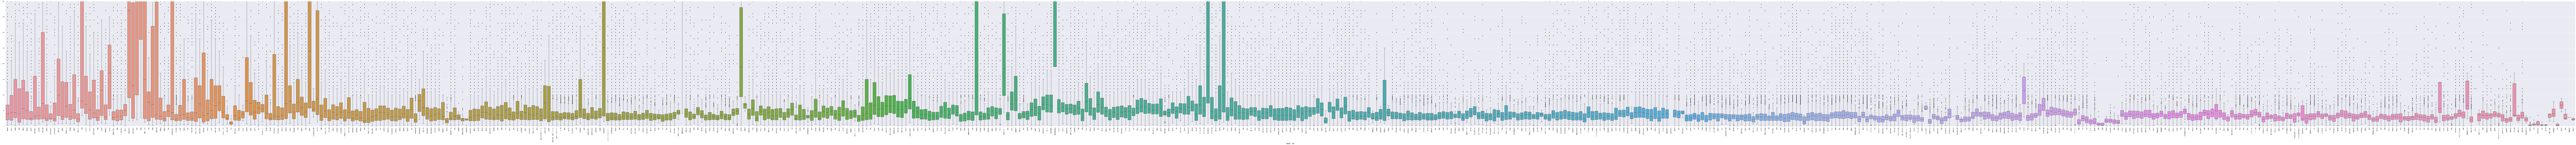

In [66]:
#box plot overallqual/saleprice
var = '最寄駅：名称'
data = pd.concat([df_train['y'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(400, 20))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=400);
fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)


In [0]:
df_train = df_train.drop('id', axis=1)

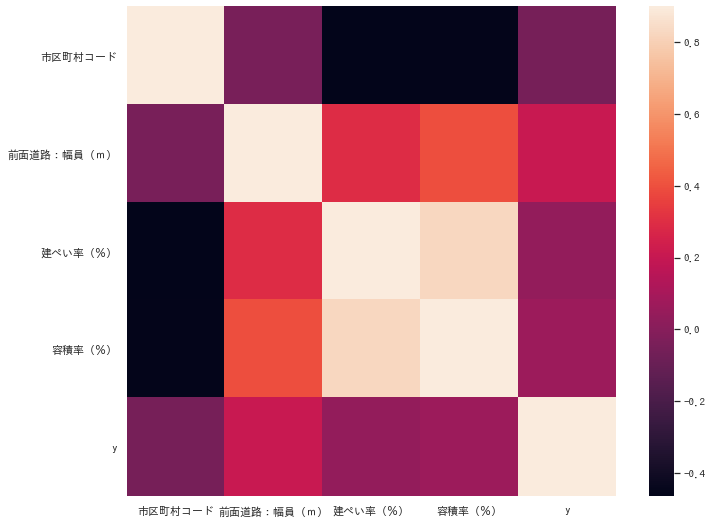

In [68]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

In [0]:
#そもそも数値になっているものが少ない→築年数や駅からの距離は数値に直す必要がある
# convert data type
df_train['最寄駅：距離（分）'] = df_train['最寄駅：距離（分）'].replace('30分?60分','45')
df_train['最寄駅：距離（分）'] = df_train['最寄駅：距離（分）'].replace('1H?1H30','75')
df_train['最寄駅：距離（分）'] = df_train['最寄駅：距離（分）'].replace('1H30?2H','105')
df_train['最寄駅：距離（分）'] = df_train['最寄駅：距離（分）'].replace('2H?','120')
df_train['最寄駅：距離（分）'] = pd.to_numeric(df_train['最寄駅：距離（分）'], errors='coerce')

df_train['建築年'] = df_train['建築年'].dropna()
df_train['建築年'] = df_train['建築年'].str.replace('戦前','昭和20年')
df_train['年号'] = df_train['建築年'].str[:2]
df_train['和暦年数'] = df_train['建築年'].str[2:].str.strip('年').fillna(0).astype(int)
df_train.loc[df_train['年号']=='昭和','建築年(西暦)'] = df_train['和暦年数'] + 1925
df_train.loc[df_train['年号']=='平成','建築年(西暦)'] = df_train['和暦年数'] + 1988

df_train = df_train.drop('和暦年数', axis=1)

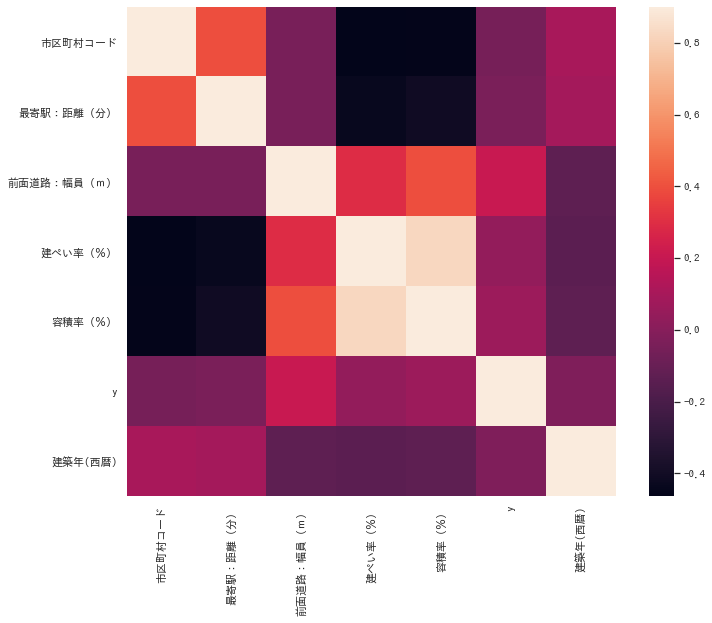

In [70]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

In [71]:
df_train['築年数'] = 2020 - df_train['建築年(西暦)']
df_train = df_train.drop('建築年(西暦)', axis=1)
df_train.columns


Index(['種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）',
       '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造', '用途',
       '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', 'y', '年号', '築年数'],
      dtype='object')

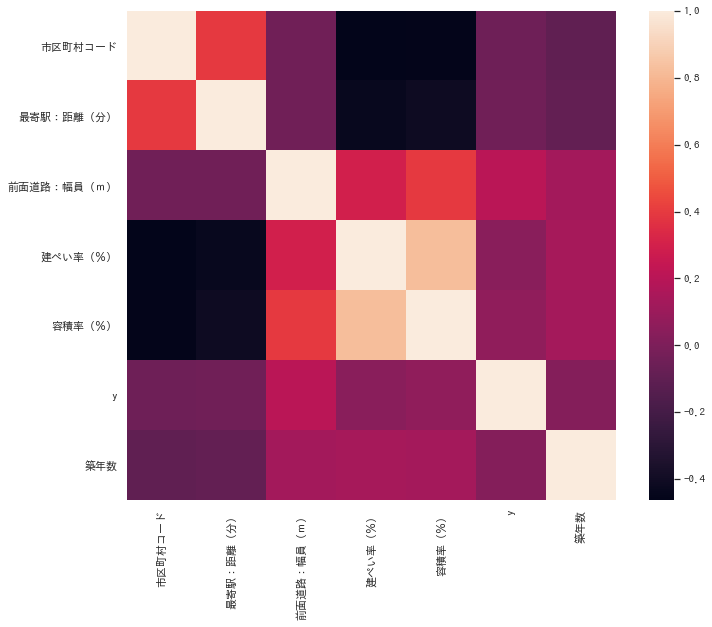

In [72]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [73]:
l = ['最寄駅：距離（分）','容積率（％）','築年数']
for name in l:
  mean = np.nanmean(df_train[name], axis=0)
  std = np.nanstd(df_train[name], axis=0)
  df_train[name] = (df_train[name] - mean)/std

model_input = df_train[['最寄駅：名称','最寄駅：距離（分）','容積率（％）','築年数','y']]

model_input = model_input.dropna(how='any', axis=0) 

#目的変数と説明変数を代入
X = model_input[['最寄駅：名称', '最寄駅：距離（分）', '容積率（％）', '築年数']]
y = model_input['y']
X = pd.get_dummies(X, drop_first=True)
X

,最寄駅：距離（分）,容積率（％）,築年数,最寄駅：名称_お花茶屋,最寄駅：名称_こどもの国(神奈川),最寄駅：名称_すずかけ台,最寄駅：名称_つくし野,最寄駅：名称_つつじケ丘,最寄駅：名称_とうきょうスカイツリー,最寄駅：名称_ときわ台(東京),最寄駅：名称_ひばりケ丘(東京),最寄駅：名称_めじろ台,最寄駅：名称_一之江,最寄駅：名称_一橋学園,最寄駅：名称_万願寺,最寄駅：名称_三ノ輪,最寄駅：名称_三ノ輪橋,最寄駅：名称_三河島,最寄駅：名称_三田(東京),最寄駅：名称_三越前,最寄駅：名称_三軒茶屋,最寄駅：名称_三鷹,最寄駅：名称_三鷹台,最寄駅：名称_上中里,最寄駅：名称_上井草,最寄駅：名称_上北台,最寄駅：名称_上北沢,最寄駅：名称_上板橋,最寄駅：名称_上町,最寄駅：名称_上石神井,最寄駅：名称_上野,最寄駅：名称_上野広小路,最寄駅：名称_上野御徒町,最寄駅：名称_上野毛,最寄駅：名称_下丸子,最寄駅：名称_下井草,最寄駅：名称_下北沢,最寄駅：名称_下板橋,最寄駅：名称_下神明,最寄駅：名称_下落合,...,最寄駅：名称_雑司が谷(東京メトロ),最寄駅：名称_雑色,最寄駅：名称_雪が谷大塚,最寄駅：名称_青井,最寄駅：名称_青山一丁目,最寄駅：名称_青梅,最寄駅：名称_青梅街道,最寄駅：名称_青物横丁,最寄駅：名称_青砥,最寄駅：名称_面影橋,最寄駅：名称_飛田給,最寄駅：名称_飛鳥山,最寄駅：名称_飯田橋,最寄駅：名称_飯能,最寄駅：名称_馬喰横山,最寄駅：名称_馬喰町,最寄駅：名称_馬込,最寄駅：名称_駒場東大前,最寄駅：名称_駒沢大学,最寄駅：名称_駒込,最寄駅：名称_高井戸,最寄駅：名称_高円寺,最寄駅：名称_高尾(東京),最寄駅：名称_高尾山口,最寄駅：名称_高島平,最寄駅：名称_高幡不動,最寄駅：名称_高松(東京),最寄駅：名称_高田馬場,最寄駅：名称_高輪台,最寄駅：名称_高野(東京),最寄駅：名称_鬼子母神前,最寄駅：名称_鮫洲,最寄駅：名称_鵜の木,最寄駅：名称_鶯谷,最寄駅：名称_鶴川,最寄駅：名称_鷹の台,最寄駅：名称_鷺ノ宮,最寄駅：名称_麹町,最寄駅：名称_麻布十番,最寄駅：名称_黒川(神奈川)
0,-0.994401,2.106999,0.974551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.587720,1.479717,-0.393225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.791061,1.479717,-1.041119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.587720,1.479717,-0.393225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.791061,1.479717,0.830575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356220,0.225641,-1.154865,-0.753166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356221,0.225641,-1.154865,-0.753166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356223,1.344013,-0.402127,-0.681178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356224,0.530652,-1.154865,-0.681178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
#そもそも数値になっているものが少ない→築年数や駅からの距離は数値に直す必要がある
# convert data type
df_test['最寄駅：距離（分）'] = df_test['最寄駅：距離（分）'].replace('30分?60分','45')
df_test['最寄駅：距離（分）'] = df_test['最寄駅：距離（分）'].replace('1H?1H30','75')
df_test['最寄駅：距離（分）'] = df_test['最寄駅：距離（分）'].replace('1H30?2H','105')
df_test['最寄駅：距離（分）'] = df_test['最寄駅：距離（分）'].replace('2H?','120')
df_test['最寄駅：距離（分）'] = pd.to_numeric(df_test['最寄駅：距離（分）'], errors='coerce')

df_test['建築年'] = df_test['建築年'].dropna()
df_test['建築年'] = df_test['建築年'].str.replace('戦前','昭和20年')
df_test['年号'] = df_test['建築年'].str[:2]
df_test['和暦年数'] = df_test['建築年'].str[2:].str.strip('年').fillna(0).astype(int)
df_test.loc[df_test['年号']=='昭和','建築年(西暦)'] = df_test['和暦年数'] + 1925
df_test.loc[df_test['年号']=='平成','建築年(西暦)'] = df_test['和暦年数'] + 1988

df_test = df_test.drop('和暦年数', axis=1)
df_test['築年数'] = 2020 - df_test['建築年(西暦)']
df_test = df_test.drop('建築年(西暦)', axis=1)
df_test.columns

l = ['最寄駅：距離（分）','容積率（％）','築年数']
for name in l:
  mean = np.nanmean(df_test[name], axis=0)
  std = np.nanstd(df_test[name], axis=0)
  df_test[name] = (df_test[name] - mean)/std

X_test = df_test[['最寄駅：名称','最寄駅：距離（分）','容積率（％）','築年数']]

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.fillna(0)
X_test

,最寄駅：距離（分）,容積率（％）,築年数,最寄駅：名称_お花茶屋,最寄駅：名称_こどもの国(神奈川),最寄駅：名称_すずかけ台,最寄駅：名称_つくし野,最寄駅：名称_つつじケ丘,最寄駅：名称_とうきょうスカイツリー,最寄駅：名称_ときわ台(東京),最寄駅：名称_ひばりケ丘(東京),最寄駅：名称_めじろ台,最寄駅：名称_一之江,最寄駅：名称_一橋学園,最寄駅：名称_万願寺,最寄駅：名称_三ノ輪,最寄駅：名称_三ノ輪橋,最寄駅：名称_三河島,最寄駅：名称_三田(東京),最寄駅：名称_三越前,最寄駅：名称_三軒茶屋,最寄駅：名称_三鷹,最寄駅：名称_三鷹台,最寄駅：名称_上中里,最寄駅：名称_上井草,最寄駅：名称_上北台,最寄駅：名称_上北沢,最寄駅：名称_上板橋,最寄駅：名称_上町,最寄駅：名称_上石神井,最寄駅：名称_上野,最寄駅：名称_上野広小路,最寄駅：名称_上野御徒町,最寄駅：名称_上野毛,最寄駅：名称_下丸子,最寄駅：名称_下井草,最寄駅：名称_下北沢,最寄駅：名称_下板橋,最寄駅：名称_下神明,最寄駅：名称_下落合,...,最寄駅：名称_門前仲町,最寄駅：名称_阿佐ケ谷,最寄駅：名称_雑司が谷(東京メトロ),最寄駅：名称_雑色,最寄駅：名称_雪が谷大塚,最寄駅：名称_青井,最寄駅：名称_青山一丁目,最寄駅：名称_青梅,最寄駅：名称_青梅街道,最寄駅：名称_青物横丁,最寄駅：名称_青砥,最寄駅：名称_飛田給,最寄駅：名称_飛鳥山,最寄駅：名称_飯田橋,最寄駅：名称_馬喰横山,最寄駅：名称_馬喰町,最寄駅：名称_馬込,最寄駅：名称_駒場東大前,最寄駅：名称_駒沢大学,最寄駅：名称_駒込,最寄駅：名称_高井戸,最寄駅：名称_高円寺,最寄駅：名称_高尾(東京),最寄駅：名称_高尾山口,最寄駅：名称_高島平,最寄駅：名称_高幡不動,最寄駅：名称_高松(東京),最寄駅：名称_高田馬場,最寄駅：名称_高輪台,最寄駅：名称_高野(東京),最寄駅：名称_鮫洲,最寄駅：名称_鳩ノ巣,最寄駅：名称_鵜の木,最寄駅：名称_鶯谷,最寄駅：名称_鶴川,最寄駅：名称_鷹の台,最寄駅：名称_鷺ノ宮,最寄駅：名称_麹町,最寄駅：名称_麻布十番,最寄駅：名称_黒川(神奈川)
0,-0.792994,2.655440,1.008660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.682230,2.655440,1.205884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.792994,1.413058,0.942919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.792994,2.655440,1.008660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.014524,2.034249,1.074401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34840,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34841,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34842,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
#最寄駅でtrainにあるがtestにないcolumnがある。
diff = list(set(X.columns) - set(X_test.columns))
diff

['最寄駅：名称_浦安(千葉)',
 '最寄駅：名称_南鳩ケ谷',
 '最寄駅：名称_庚申塚',
 '最寄駅：名称_立川南',
 '最寄駅：名称_面影橋',
 '最寄駅：名称_向原(東京)',
 '最寄駅：名称_川口元郷',
 '最寄駅：名称_都電雑司ケ谷',
 '最寄駅：名称_遊園地西',
 '最寄駅：名称_東所沢',
 '最寄駅：名称_町屋駅前',
 '最寄駅：名称_武蔵小杉',
 '最寄駅：名称_竹橋',
 '最寄駅：名称_飯能',
 '最寄駅：名称_日比谷',
 '最寄駅：名称_山下(東京)',
 '最寄駅：名称_有楽町',
 '最寄駅：名称_鬼子母神前',
 '最寄駅：名称_巣鴨新田',
 '最寄駅：名称_西武新宿',
 '最寄駅：名称_国立競技場',
 '最寄駅：名称_国会議事堂前',
 '最寄駅：名称_荒川七丁目',
 '最寄駅：名称_有明(東京)',
 '最寄駅：名称_舞浜',
 '最寄駅：名称_京成上野',
 '最寄駅：名称_御嶽']

In [76]:
X = X.drop(diff, axis=1)
X

,最寄駅：距離（分）,容積率（％）,築年数,最寄駅：名称_お花茶屋,最寄駅：名称_こどもの国(神奈川),最寄駅：名称_すずかけ台,最寄駅：名称_つくし野,最寄駅：名称_つつじケ丘,最寄駅：名称_とうきょうスカイツリー,最寄駅：名称_ときわ台(東京),最寄駅：名称_ひばりケ丘(東京),最寄駅：名称_めじろ台,最寄駅：名称_一之江,最寄駅：名称_一橋学園,最寄駅：名称_万願寺,最寄駅：名称_三ノ輪,最寄駅：名称_三ノ輪橋,最寄駅：名称_三河島,最寄駅：名称_三田(東京),最寄駅：名称_三越前,最寄駅：名称_三軒茶屋,最寄駅：名称_三鷹,最寄駅：名称_三鷹台,最寄駅：名称_上中里,最寄駅：名称_上井草,最寄駅：名称_上北台,最寄駅：名称_上北沢,最寄駅：名称_上板橋,最寄駅：名称_上町,最寄駅：名称_上石神井,最寄駅：名称_上野,最寄駅：名称_上野広小路,最寄駅：名称_上野御徒町,最寄駅：名称_上野毛,最寄駅：名称_下丸子,最寄駅：名称_下井草,最寄駅：名称_下北沢,最寄駅：名称_下板橋,最寄駅：名称_下神明,最寄駅：名称_下落合,...,最寄駅：名称_長津田,最寄駅：名称_門前仲町,最寄駅：名称_阿佐ケ谷,最寄駅：名称_雑司が谷(東京メトロ),最寄駅：名称_雑色,最寄駅：名称_雪が谷大塚,最寄駅：名称_青井,最寄駅：名称_青山一丁目,最寄駅：名称_青梅,最寄駅：名称_青梅街道,最寄駅：名称_青物横丁,最寄駅：名称_青砥,最寄駅：名称_飛田給,最寄駅：名称_飛鳥山,最寄駅：名称_飯田橋,最寄駅：名称_馬喰横山,最寄駅：名称_馬喰町,最寄駅：名称_馬込,最寄駅：名称_駒場東大前,最寄駅：名称_駒沢大学,最寄駅：名称_駒込,最寄駅：名称_高井戸,最寄駅：名称_高円寺,最寄駅：名称_高尾(東京),最寄駅：名称_高尾山口,最寄駅：名称_高島平,最寄駅：名称_高幡不動,最寄駅：名称_高松(東京),最寄駅：名称_高田馬場,最寄駅：名称_高輪台,最寄駅：名称_高野(東京),最寄駅：名称_鮫洲,最寄駅：名称_鵜の木,最寄駅：名称_鶯谷,最寄駅：名称_鶴川,最寄駅：名称_鷹の台,最寄駅：名称_鷺ノ宮,最寄駅：名称_麹町,最寄駅：名称_麻布十番,最寄駅：名称_黒川(神奈川)
0,-0.994401,2.106999,0.974551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.587720,1.479717,-0.393225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.791061,1.479717,-1.041119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.587720,1.479717,-0.393225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.791061,1.479717,0.830575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356220,0.225641,-1.154865,-0.753166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356221,0.225641,-1.154865,-0.753166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356223,1.344013,-0.402127,-0.681178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356224,0.530652,-1.154865,-0.681178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
X.columns

Index(['最寄駅：距離（分）', '容積率（％）', '築年数', '最寄駅：名称_お花茶屋', '最寄駅：名称_こどもの国(神奈川)',
       '最寄駅：名称_すずかけ台', '最寄駅：名称_つくし野', '最寄駅：名称_つつじケ丘', '最寄駅：名称_とうきょうスカイツリー',
       '最寄駅：名称_ときわ台(東京)',
       ...
       '最寄駅：名称_高野(東京)', '最寄駅：名称_鮫洲', '最寄駅：名称_鵜の木', '最寄駅：名称_鶯谷', '最寄駅：名称_鶴川',
       '最寄駅：名称_鷹の台', '最寄駅：名称_鷺ノ宮', '最寄駅：名称_麹町', '最寄駅：名称_麻布十番',
       '最寄駅：名称_黒川(神奈川)'],
      dtype='object', length=621)

In [89]:
diff = list(set(X_test.columns) - set(X.columns))
X_test = X_test.drop(diff, axis=1)
X_test

,最寄駅：距離（分）,容積率（％）,築年数,最寄駅：名称_お花茶屋,最寄駅：名称_こどもの国(神奈川),最寄駅：名称_すずかけ台,最寄駅：名称_つくし野,最寄駅：名称_つつじケ丘,最寄駅：名称_とうきょうスカイツリー,最寄駅：名称_ときわ台(東京),最寄駅：名称_ひばりケ丘(東京),最寄駅：名称_めじろ台,最寄駅：名称_一之江,最寄駅：名称_一橋学園,最寄駅：名称_万願寺,最寄駅：名称_三ノ輪,最寄駅：名称_三ノ輪橋,最寄駅：名称_三河島,最寄駅：名称_三田(東京),最寄駅：名称_三越前,最寄駅：名称_三軒茶屋,最寄駅：名称_三鷹,最寄駅：名称_三鷹台,最寄駅：名称_上中里,最寄駅：名称_上井草,最寄駅：名称_上北台,最寄駅：名称_上北沢,最寄駅：名称_上板橋,最寄駅：名称_上町,最寄駅：名称_上石神井,最寄駅：名称_上野,最寄駅：名称_上野広小路,最寄駅：名称_上野御徒町,最寄駅：名称_上野毛,最寄駅：名称_下丸子,最寄駅：名称_下井草,最寄駅：名称_下北沢,最寄駅：名称_下板橋,最寄駅：名称_下神明,最寄駅：名称_下落合,...,最寄駅：名称_長津田,最寄駅：名称_門前仲町,最寄駅：名称_阿佐ケ谷,最寄駅：名称_雑司が谷(東京メトロ),最寄駅：名称_雑色,最寄駅：名称_雪が谷大塚,最寄駅：名称_青井,最寄駅：名称_青山一丁目,最寄駅：名称_青梅,最寄駅：名称_青梅街道,最寄駅：名称_青物横丁,最寄駅：名称_青砥,最寄駅：名称_飛田給,最寄駅：名称_飛鳥山,最寄駅：名称_飯田橋,最寄駅：名称_馬喰横山,最寄駅：名称_馬喰町,最寄駅：名称_馬込,最寄駅：名称_駒場東大前,最寄駅：名称_駒沢大学,最寄駅：名称_駒込,最寄駅：名称_高井戸,最寄駅：名称_高円寺,最寄駅：名称_高尾(東京),最寄駅：名称_高尾山口,最寄駅：名称_高島平,最寄駅：名称_高幡不動,最寄駅：名称_高松(東京),最寄駅：名称_高田馬場,最寄駅：名称_高輪台,最寄駅：名称_高野(東京),最寄駅：名称_鮫洲,最寄駅：名称_鵜の木,最寄駅：名称_鶯谷,最寄駅：名称_鶴川,最寄駅：名称_鷹の台,最寄駅：名称_鷺ノ宮,最寄駅：名称_麹町,最寄駅：名称_麻布十番,最寄駅：名称_黒川(神奈川)
0,-0.792994,2.655440,1.008660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.682230,2.655440,1.205884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.792994,1.413058,0.942919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.792994,2.655440,1.008660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.014524,2.034249,1.074401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34840,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34841,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34842,0.000000,-0.450515,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X, y)

test_predicted = ridge.predict(X_test)
submit_df = pd.DataFrame({'y': test_predicted})
submit_df.index.name = 'id'
submit_df.to_csv('submission.csv')

#TODO
#KFold Cross Validation with regressions